In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
# PONER EN APÉNDICE

In [24]:
puntos_1 = 100
puntos_2 = 10000
puntos_3 = 100000

mu_1, sigma_1 = 0, 1
s_1 = np.random.normal(mu_1, sigma_1, puntos_1)

mu_2, sigma_2 = 0 , 1
s_2 = np.random.normal(mu_2, sigma_2, puntos_2)

mu_3, sigma_3 = 0 , 1
s_3 = np.random.normal(mu_3, sigma_3, puntos_3)

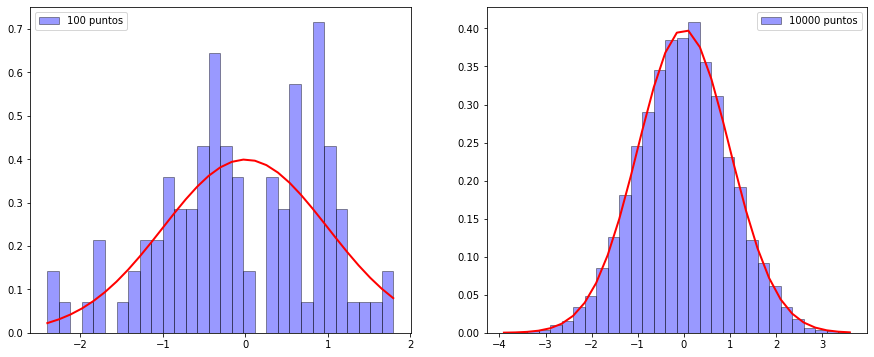

In [25]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
count_1, bins_1, ignored_1 = plt.hist(s_1, 30, density=True, alpha=0.4 , color="b",
                                      edgecolor='k', label = f'{len(s_1)} puntos')
plt.plot(bins_1, 1/(sigma_1*np.sqrt(2*np.pi))*np.exp(-(bins_1-mu_1)**2/(2*sigma_1**2)),
         linewidth=2, color='r')

plt.legend()

plt.subplot(1,2,2)
count_2, bins_2, ignored_2 = plt.hist(s_2, 30, density=True, alpha=0.4 , color="b",
                                      edgecolor='k',label = f'{len(s_2)} puntos')
plt.plot(bins_2, 1/(sigma_2*np.sqrt(2*np.pi))*np.exp(-(bins_2-mu_2)**2/(2*sigma_2**2)),
         linewidth=2, color='r')

plt.legend()
plt.show()

# representación del error residual

In [26]:
np.median(s_1)

-0.15802684804622644

In [27]:
np.median(s_2)  #mientras más puntos tenga, la mediana estará más cerca del 0

-0.002673213208442058

In [34]:
def MAD(R_percent): #MAD dado un error percentual residual que distribuye gaussianamente para pocos y muchos datos
    s_mad =  1.4826 *np.median(np.abs(R_percent - np.median(R_percent)))
    #s_mad = 1.4826 * np.median((R_percent - np.median(R_percent)))
    
    return s_mad

In [35]:
print(f' MAD {len(s_1)} puntos: ',MAD(s_1),'\n',
      f'MAD {len(s_2)} puntos: ',MAD(s_2),'\n',
      f'MAD {len(s_3)} puntos: ',MAD(s_3))

#MAD calcula la desviación estandar de la distribución gaussiana asociada al error residual
# Con 100 puntos ya es como suficiente, por eso su MAD se acerca al de los 10000 puntos (con 10 por ejm no es suf.)
# Demostrar que mientras maás puntos tengo, el MAD será más cercano a la desviación estandar de la gaussiana, o sea corresponde a un error típico, tal que contiene aprox. el 70% de los datos (comprobar si es 68% o 70%)
# AC: Mientras más puntos tenga, el MAD será un valor fiable de la desviación estandar

 MAD 100 puntos:  1.177460803020693 
 MAD 10000 puntos:  0.9932737369458509 
 MAD 100000 puntos:  0.9999302553820651


In [7]:
from astropy.stats import mad_std
print( mad_std((Y_1 - s_1 )/ Y_1)*100 , mad_std((Y_2 - s_2 )/ Y_2)*100)

7.904882002398164 9.869345556269483
